<a href="https://colab.research.google.com/github/vertuam/Experimentos-CCE-UEL/blob/master/ProjetoClassificacaoExercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# URL Dataset from reposirioty
urlDataset = 'https://github.com/vertuam/Experimentos-CCE-UEL/blob/master/zoo.csv?raw=true'
urlClasses = 'https://github.com/vertuam/Experimentos-CCE-UEL/blob/master/class.csv?raw=true'

# Load Dataset from reposirioty
dfDataset = pd.read_csv(urlDataset, index_col=0)
dfClasses = pd.read_csv(urlClasses, index_col=0)

print('Dataset carregados com sucesso!')

Dataset carregados com sucesso!


In [102]:
# Dataset ANIMAIS caregado
dfDataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [103]:
# Dataset de CLASSES carregado
dfClasses.head()

,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
Class_Number,,,
1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
5,4,Amphibian,"frog, frog, newt, toad"


In [95]:
# Verificar a qualidade dos dados e valores ausentes (NaN) (Animais)
dfDataset.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [97]:
# Dados do Dataset
dfDataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [220]:
# Vsariable and Print da classes existentes no dataset
print(dfDataset.class_type.unique())
unique = dfDataset.class_type.unique()

[1 4 2 7 6 5 3]


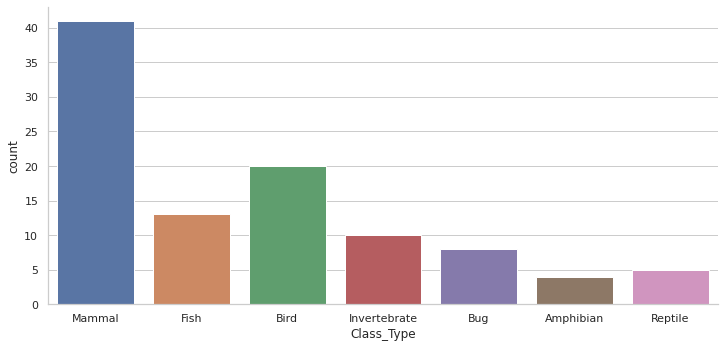

In [345]:
# Join tabela animal e classes
df=pd.merge(dfDataset, dfClasses, how='left', left_on='class_type', right_on='Class_Number')
df.head()

# Verificar os tipos e as quantidades de animais
sns.catplot('Class_Type', data=df, kind="count", aspect=2)

In [116]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(dfDataset[0:17])
transformed = model.transform(dfDataset[0:17])
print('Principle components: ',model.components_)

Principle components:  [[-1.69933486e-01 -2.88763122e-03  1.69933486e-01 -1.69933486e-01
  -2.88763122e-03  1.32090028e-01  6.63942352e-02 -8.31446671e-02
  -8.60322983e-02 -1.72821118e-01  0.00000000e+00  8.67888193e-02
  -4.66669341e-01 -2.36644486e-02 -2.30072961e-02 -1.49473144e-01
   7.73672617e-01]
 [ 2.41158209e-02 -4.11575317e-02 -2.41158209e-02  2.41158209e-02
  -4.11575317e-02  1.47344802e-02  5.05252553e-02 -1.15969521e-01
  -1.57127053e-01 -1.70417108e-02  0.00000000e+00 -1.40085342e-01
   8.18180590e-01 -1.72051147e-01 -5.38566268e-02  2.06660890e-02
   4.81348759e-01]
 [-2.28412231e-01  4.18277875e-01  2.28412231e-01 -2.28412231e-01
   4.18277875e-01 -1.87344196e-01 -2.00056295e-01 -4.40976727e-01
  -2.26988529e-02  1.89865643e-01  0.00000000e+00 -2.12564496e-01
   6.37049736e-02  6.24504129e-02  2.50456387e-01 -2.54222984e-01
  -8.32224962e-02]
 [-1.75969751e-03 -1.31065133e-01  1.75969751e-03 -1.75969751e-03
  -1.31065133e-01  2.74004136e-01 -6.40153506e-01  2.01859003e

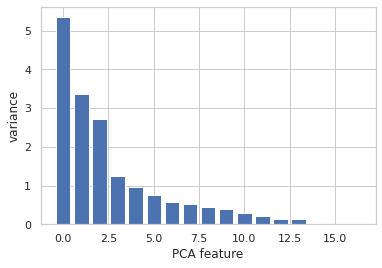

In [118]:
# PCA Variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(dfDataset)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

 :(  - Erro: Dados Ilegíveis! ->  frog    5
frog    5
Name: class_type, dtype: int64
 :(  - Erro: Dados Ilegíveis! ->  frog    5
frog    5
Name: class_type, dtype: int64


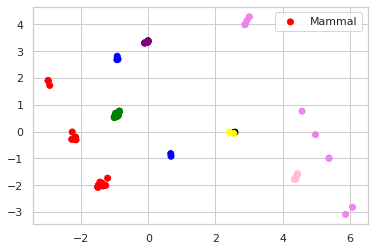

In [277]:
# a) Visualizar usando uma PCA as 7 classes de animais;

# PCA
pca = PCA(n_components = 2)
pca.fit(dfDataset)
transformed = pca.transform(dfDataset)
x = transformed[:,0]
y = transformed[:,1]
legend = []
color = []
for i in dfDataset.index:
  #Refatorar para usar while para deixar dinamico quanto ao numero de classes
  try:
    if dfDataset['class_type'][i]==1:
      legend = np.append(legend, ['Mammal'])
      color  = np.append(color, ['red'])
    elif dfDataset['class_type'][i]==2:
      legend = np.append(legend, 'Bird')
      color  = np.append(color, ['green'])
    elif dfDataset['class_type'][i]==3:
      legend = np.append(legend, 'Reptile')
      color  = np.append(color, ['blue'])
    elif dfDataset['class_type'][i]==4:
      legend = np.append(legend, 'Fish')
      color  = np.append(color, ['purple'])
    elif dfDataset['class_type'][i]==5:
      legend = np.append(legend, 'Amphibian')
      color  = np.append(color, ['yellow'])
    elif dfDataset['class_type'][i]==6:
      legend = np.append(legend, 'Bug')
      color  = np.append(color, ['pink'])
    elif dfDataset['class_type'][i]==7:
      legend = np.append(legend, 'Invertebrate')
      color  = np.append(color, ['violet'])

  except:
    color  = np.append(color, ['black'])
    print(' :(  - Erro: Dados Ilegíveis! -> ', dfDataset['class_type'][i])

plt.scatter(x, y, c=color)

plt.legend(legend)
plt.show()

In [307]:
# b) Implemente um código para dividir o conjunto de animais entre treino e teste;

from sklearn.model_selection import train_test_split

# 80/20 split
# Split dataset em training set e test set

X = dfDataset.iloc[:,1:14]
y = dfDataset.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Predito  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,\n                     weights='uniform')  All
Real                                                                                                                                                                                                      
1                                                       15                                                                                                                                              15
2                                                        3                                                                                                                                               3
3                                                        1                                                                                                                                  

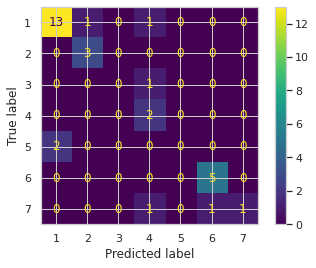

In [337]:
# c) Implemente um k-NN e demonstre graficamente o melhor valor de "k" encontrado;

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix


y=dfDataset['class_type'].values
X=dfDataset.drop(['class_type'],axis=1).values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

# Realizando as predições
resultado = knn.fit(X_train, y_train)
knn.score(X_train,y_train)

# Matriz de confusão
print (pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

plot_confusion_matrix(resultado, X_test, y_test)
plt.show()

Accuracy: 0.95 (+/- 0.06)
Predito  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,\n    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',\n    max_iter=-1, probability=False, random_state=None, shrinking=True,\n    tol=0.001, verbose=False)  All
Real                                                                                                                                                                                                                                                                       
1                                                       15                                                                                                                                                                                                               15
2                                                        3                                                                                                                

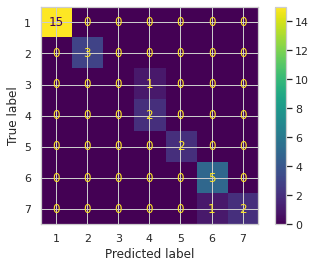

In [344]:
# d) Implemente uma SVM e demonstre graficamente a melhor configuração de SVM (variando no mínimo kernel e cost);

# SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
SVC(random_state=0)

print("Accuracy: %0.2f (+/- %0.2f)" % (score_svc.mean(), score_svc.std() * 2))

# Matriz de confusão
print(pd.crosstab(y_test, clf, rownames=['Real'], colnames=['Predito'], margins=True))

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

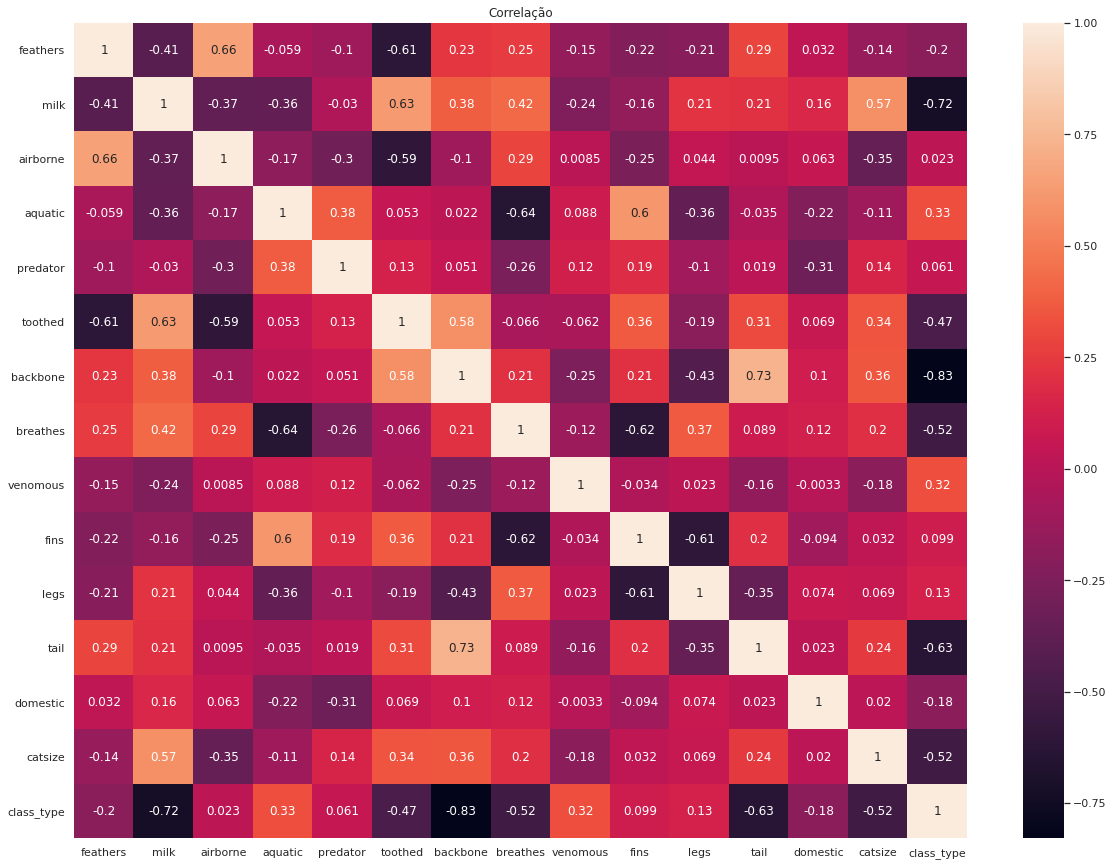

In [338]:
# Mapa de calor para apresentar as correlações
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlação")
corr = dfDataset.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)